### Загружаем данные

In [22]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score,recall_score, accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import classification_report

In [3]:
item = 'diamonds' # Выбрать из поля Item для вашего датасета
package = 'ggplot2' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Для более удобной сортировки категориальных переменных заменим их символьные представления числовыми

In [4]:
cut_dict = {
    'Fair' : 0,
    'Good' : 1,
    'Very Good' : 2,
    'Premium' : 3,
    'Ideal' : 4
}
clarity_dict = {
    'I1' : 1,
    'SI2' : 2,
    'SI1' : 3,
    'VS2' : 4,
    'VS1' : 5,
    'VVS2' : 6,
    'VVS1' : 7,
    'IF' : 8
}

df['cut_value'] = df['cut'].map(cut_dict)
df['clarity_value'] = df['clarity'].map(clarity_dict)

### Описание датасета


A data frame with 53940 rows and 10 variables:

price - price in US dollars ($326–$18,823)  
carat - weight of the diamond (0.2–5.01)  
cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)  
color - diamond colour, from D (best) to J (worst)  
clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  
x - length in mm (0–10.74)  
y - width in mm (0–58.9)  
z - depth in mm (0–31.8)  
depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)  
table - width of top of diamond relative to widest point (43–95)

### Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:

    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи

    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификации или регрессии, которая может иметь практическую ценность

9) Разделите датасет на обучающую (60%) и тестовую (40%) выборки. Далее тестовую выборку разделите пополам (20% и 20%):

    а). Первая половина будет использоваться для оценки качества модели. Предполагается, что здесь вы знаете наблюдаемые значения таргета и можете сравнивать их с предсказаниями

    б). Вторая половина будет использоваться для построения прогнозов. Предполагается, что здесь значения таргета вам неизвестны – как в практической ситуации использования моделей прогнозирования.

10) Обучите 3 различные модели, проведите оценку их качества на первой половине тестовой выборки

11) Для повышения качества можете пользоваться следующими приемами:

    а). Нормализация и стандартизация показателей
  
    б). Подбор гиперпараметров

    в). Включение / исключение дополнительных переменных
    
    г). Трансформация переменных (квадраты, логарифмы и т.п.)

12) Выберите ту модель и набор переменных, которые по вашему мнению дают наиболее удовлетворительное качество.

13) На основе второй половины тестовой выборки сделайте предсказание целевой переменной. На основе предсказаний сделайте рекомендации для потенциальных пользователей вашего анализа

14) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!

### Гипотезы

1) Качество огранки алмала зависит от чистоты камня. Предположим, что для более качественной огранки трубуются большие трудозатраты и достижения максимального эффекта выбираются наиболее качественные камни. Ожидаем увидеть здесь линейную зависимость

2) Цена зависит от чистоты камня. Ожидаем прямую линейную зависимость.

3) Цена зависит от веса камня. Также прямую ожидаем линейную зависимоть.

### Разведочный анализ выбранных переменных

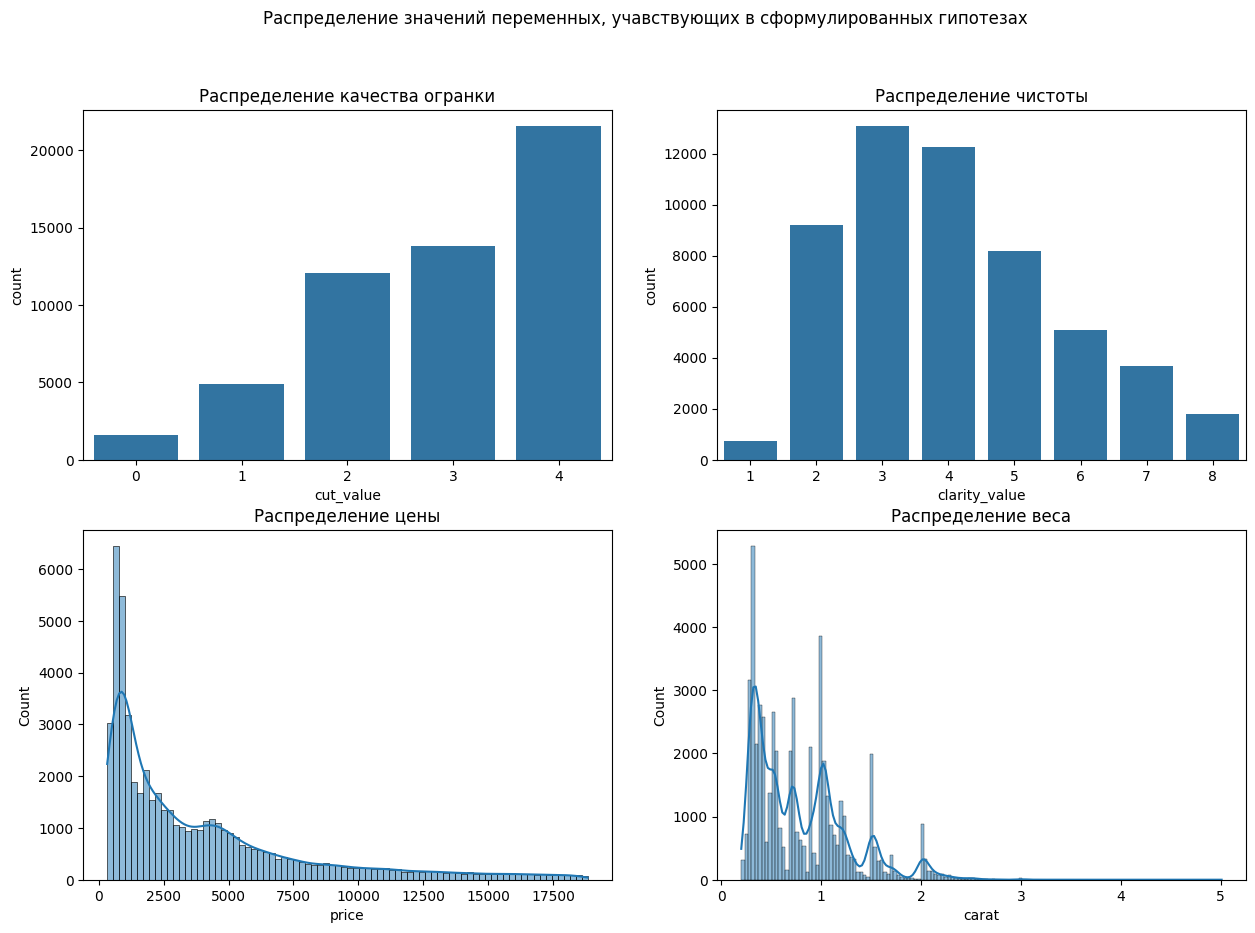

In [5]:
fig, ax  = plt.subplots(2,2, figsize = (15,10))
plt.suptitle('Распределение значений переменных, учавствующих в сформулированных гипотезах')
sns.countplot(data=df, x='cut_value', ax = ax[0, 0])
ax[0, 0].set_title('Распределение качества огранки')
sns.countplot(data=df, x='clarity_value', ax = ax[0, 1])
ax[0, 1].set_title('Распределение чистоты')
sns.histplot(df['price'], kde = True, ax = ax[1, 0])
ax[1, 0].set_title("Распределение цены")
sns.histplot(df['carat'], kde = True, ax = ax[1, 1])
ax[1, 1].set_title("Распределение веса")
plt.show()

### Очистка данных

#### Пропуски

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x              53940 non-null  float64
 8   y              53940 non-null  float64
 9   z              53940 non-null  float64
 10  cut_value      53940 non-null  int64  
 11  clarity_value  53940 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 4.9+ MB


Пропусков нет

#### Выбросы

In [7]:
def drop_outliers(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    print(variable, lower_bound, upper_bound)
    return df[(df[variable]>=lower_bound)&(df[variable]<=upper_bound)]

In [8]:
df.describe()

,carat,depth,table,price,x,y,z,cut_value,clarity_value
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.904097,4.051020
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600,1.647136
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000,4.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,8.000000


In [9]:
df = drop_outliers(df, "carat")
df = drop_outliers(df, "depth")
df = drop_outliers(df, "table")
df = drop_outliers(df, "price")
df = drop_outliers(df, "x")
df = drop_outliers(df, "y")
df = drop_outliers(df, "z")

carat -0.5599999999999999 2.0
depth 59.0 64.6
table 51.5 63.5
price -5174.0 11042.0
x 1.9650000000000007 9.044999999999998
y 1.9900000000000002 9.03
z 1.1850000000000003 5.625


Очистили от выбросов все числовые переменные.

In [10]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_value,clarity_value
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,2
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,3
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,3
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,2,3
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,2


### Проверка распределения на соответствие нормальному

In [11]:
def normtest(data):
    # Гистограмма с наложенной нормальной кривой

    fig, ax  = plt.subplots(1,2, figsize = (15,5))

    # Гистограмма
    sns.histplot(data, kde=True, stat="density", bins=30, label="Реальное распределение", ax=ax[0])
    mean, std = data.mean(), data.std()
    x = np.linspace(data.min(), data.max(), 100)
    pdf = stats.norm.pdf(x, mean, std)
    ax[0].plot(x, pdf, 'r-', label='Нормальное распределение')
    ax[0].set_title("Гистограмма с наложенной нормальной кривой")
    ax[0].legend()

    # QQ-plot
    stats.probplot(data, dist="norm", plot=ax[1])
    ax[1].set_title("QQ-plot")
    plt.show()

    # Тест Шапиро
    shapiro_test = stats.shapiro(data.sample(5000))
    norm_result_view = np.where(shapiro_test[1] > 0.05, "является", "не является")
    print(f"p-value в тесте Шапиро {shapiro_test[1]}")
    print(f"Распределение {norm_result_view} нормальным")

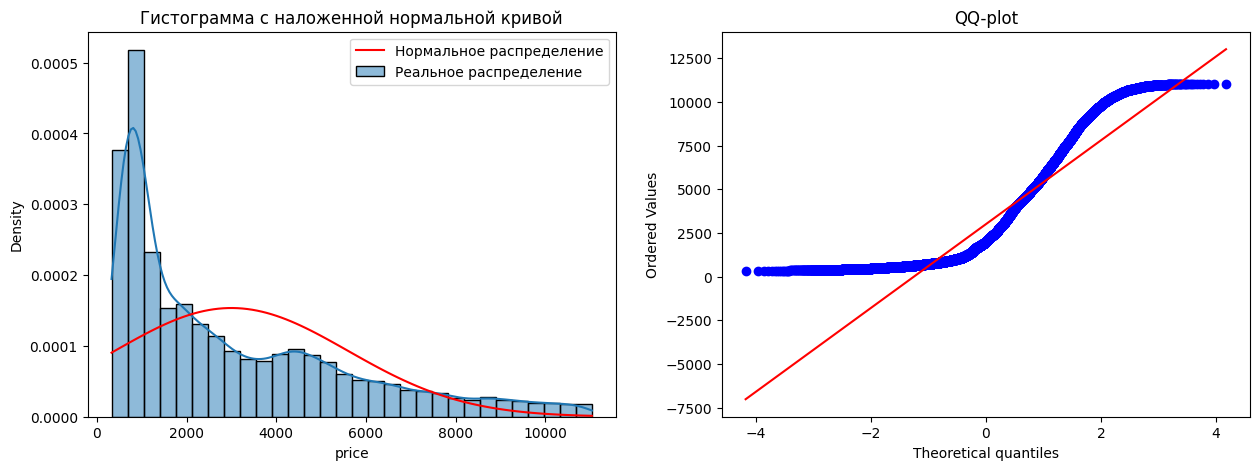

p-value в тесте Шапиро 4.937349007015721e-57
Распределение не является нормальным


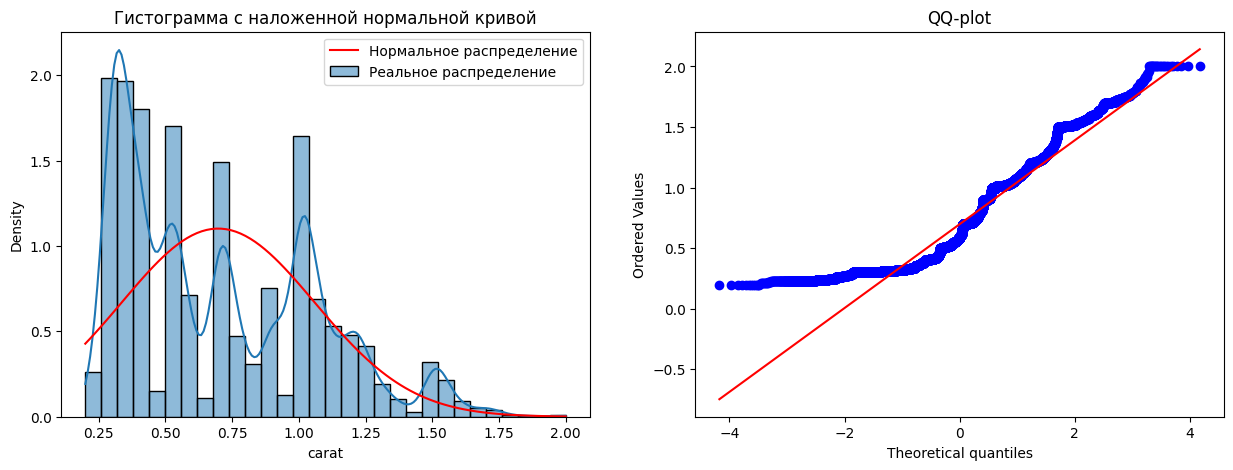

p-value в тесте Шапиро 4.199914330932723e-46
Распределение не является нормальным


In [12]:
normtest(df['price'])
normtest(df['carat'])

### Проверка гипотезы №1 о взаимосвязи качества огранки и чистоты камня

Chi-squared: 2448.017606381567
P-value: 0.0
Degrees of freedom: 28
Cramer's V: 0.11468362530042137


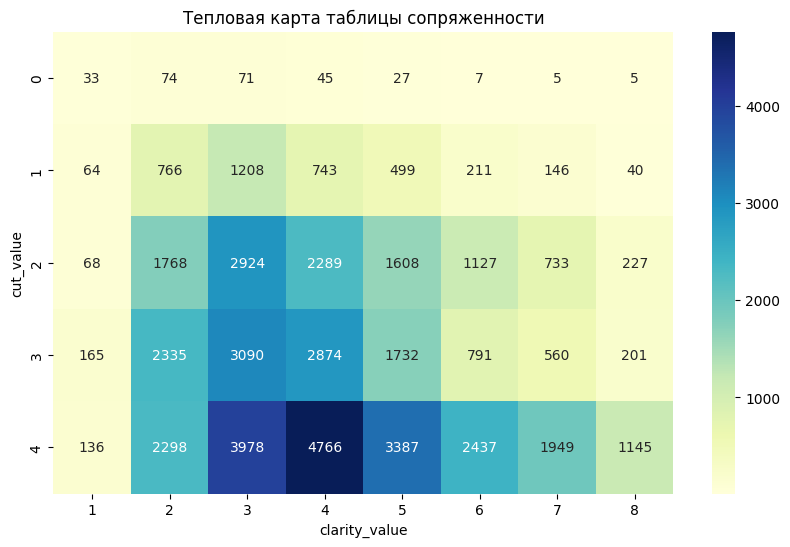

In [13]:
# Таблица сопряженности
contingency_table = pd.crosstab(df['cut_value'], df['clarity_value'])

# Хи-квадрат тест
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Вычисление Cramer's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Вывод результатов
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Cramer's V: {cramers_v}")

# Визуализация тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Тепловая карта таблицы сопряженности")
plt.show()

Нулевая гипотеза теста Хи-квадрат предполагает отчутствие связи между рассматриваемыми переменными. Соответственно, альтернативная гипотеза - это наличие такой связи.

Т.к. p-value теста Хи-квадрат ниже 0.05, то мы отвергаем нулевую гипотезу. Т.е. статистически занчимая связь между переменными есть.

### Проверка гипотезы №2 о взаимосвязи чистоты камня и цены

Поскольку цена не имеет нормального распределения, используем тест Краскела-Уоллеса

In [14]:
kruskal_result = stats.kruskal(
    *[df.loc[df['clarity'] == group, 'price'] for group in df['clarity'].unique()]
)
print(f"Статистика = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")

Статистика = 2222.074871905403, p-value = 0.0


Нулевая гипотеза теста Краскела-Уоллеса предполагает отсутствие связи между рассматриваемыми переменными. Соответственно, альтернативная гипотеза - это наличие такой связи.

Т.к. p-value меньше 0.05, нулевая гипотеза отвергается. Т.е. связь между переменными есть.

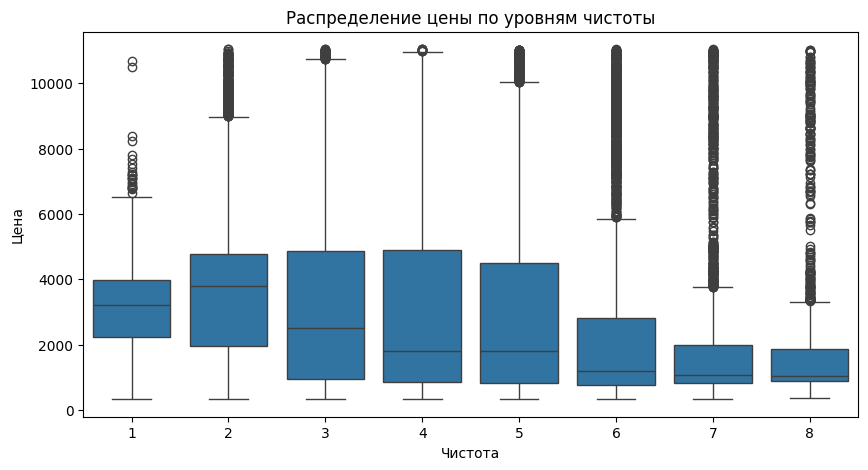

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='clarity_value', y='price')
plt.title("Распределение цены по уровням чистоты")
plt.xlabel("Чистота")
plt.ylabel("Цена")
plt.show()

На графике видно, что зависимость цены от чистоты обратная. Т.е. чем лучше чистота, тем ниже цена. Это явно не то, что ожидалось. Можно предположить, что есть какой-то ещё фактор, зависимый от чистоты и имеющий гораздо большее влияние на цену. Например, более чистые камни, имеют меньший вес. Попробуем это проверить.

In [16]:
kruskal_result = stats.kruskal(
    *[df.loc[df['clarity'] == group, 'carat'] for group in df['clarity'].unique()]
)
print(f"Статистика = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")

Статистика = 7333.422580259688, p-value = 0.0


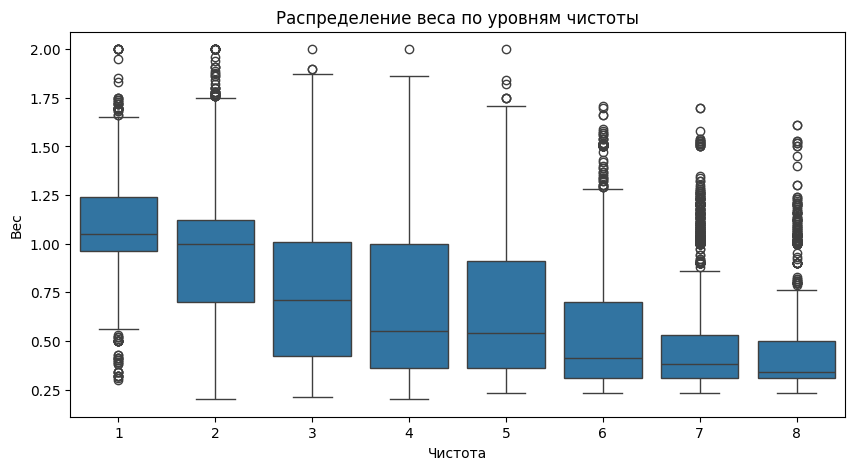

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='clarity_value', y='carat')
plt.title("Распределение веса по уровням чистоты")
plt.xlabel("Чистота")
plt.ylabel("Вес")
plt.show()

Так и есть. Более чистые камни имеют меньший вес.

### Проверка гипотезы №3 о взаимосвязи цены и веса.

Поскольку ни цена, ни вес не имеют нормального распределения используем для проверки гипотезы тест Спирмана.

In [18]:
spearman_corr, spearman_p = stats.spearmanr(df['carat'], df['price'])
print(f"Коэффициент корреляции Спирмена: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")

Коэффициент корреляции Спирмена: 0.955, p-value: 0.000


Есть сильная статистически значимая линейная зависимость.

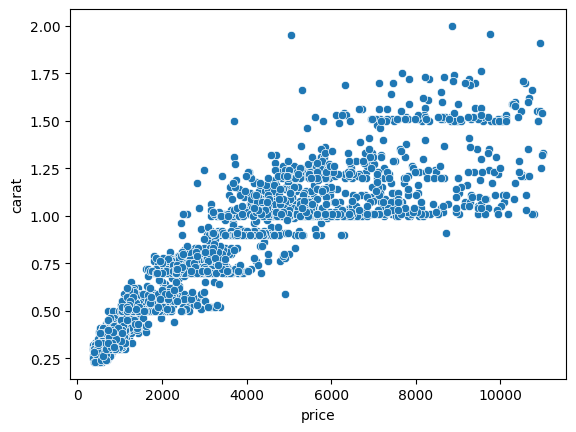

In [19]:
sns.scatterplot(data = df.sample(3000), x = 'price', y = 'carat')
plt.show()

### Задача регрессии

Предсказать цену алммаза на основе его характеристик

### Подготовка данных

Удалим из данных колонки описывающие геометрические размеры алмаза. Предполагаем, что их значения сами по себе не вляют на цену, а комбинация их значений уже входит в поле carat.

In [20]:
df.drop(['x', 'y', 'z', 'depth', 'table'], axis=1, inplace=True)

In [23]:
df = pd.concat([df, pd.get_dummies(df['cut'], dtype=np.uint8, prefix='cut', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['color'], dtype=np.uint8, prefix='color', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['clarity'], dtype=np.uint8, prefix='clarity', drop_first=True)], axis=1)
df.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)

### Разделение датасета

In [27]:
x = df.drop('price', axis=1).values
y = df[['price']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_test, x_forecast, y_test, y_forecast = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
y_forecast = 0
(
    len(x_train),
    len(x_test),
    len(x_forecast),
)

(27919, 9306, 9307)

### Постоение моделей

#### Функция оценки моделей регрессии

In [28]:
def regression_metrics(y_test, y_pred):
    
    print('R2', r2_score(y_test, y_pred))
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
    
    errors = y_test - y_pred

    fig, ax  = plt.subplots(1,3, figsize = (18,4))

    # График истинных значений против предсказанных
    ax[0].scatter(y_test, y_pred)#, alpha=0.6, color='green')
    ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')#, label='Идеальное совпадение')
    ax[0].set_title("График истинных значений против предсказанных")
    ax[0].set_xlabel("Истинные значения (y_test)")
    ax[0].set_ylabel("Предсказанные значения (y_pred)")
    #ax[0].legend()

    # Гистограмма ошибок
    sns.histplot(errors, bins=30, kde=True, ax=ax[1])
    ax[1].axvline(0, color='red', linestyle='--', label='Ноль ошибки')
    ax[1].set_title("Гистограмма ошибок (y_test - y_pred)")
    ax[1].set_xlabel("Ошибка")
    ax[1].set_ylabel("Частота")
    ax[1].legend().remove()

    ax[2].scatter(y_pred, errors)#, alpha=0.6, color='blue')
    ax[2].axhline(0, color='red', linestyle='--', label='Ноль ошибки')
    ax[2].set_title("График остатков против предсказанных значений")
    ax[2].set_xlabel("Предсказанные значения (y_pred)")
    ax[2].set_ylabel("Остатки (y_true - y_pred)")
    
    plt.tight_layout()
    plt.show()

#### Базовая модель

Для сравнения точности будущих моделей линейной регрессии, сформируем оценки простого предсказанием по среднему значению

R2 -0.0001892537253249671
MAE 2141.6496883730924
RMSE 2620.98106341781
MAPE 1.4616612907038504


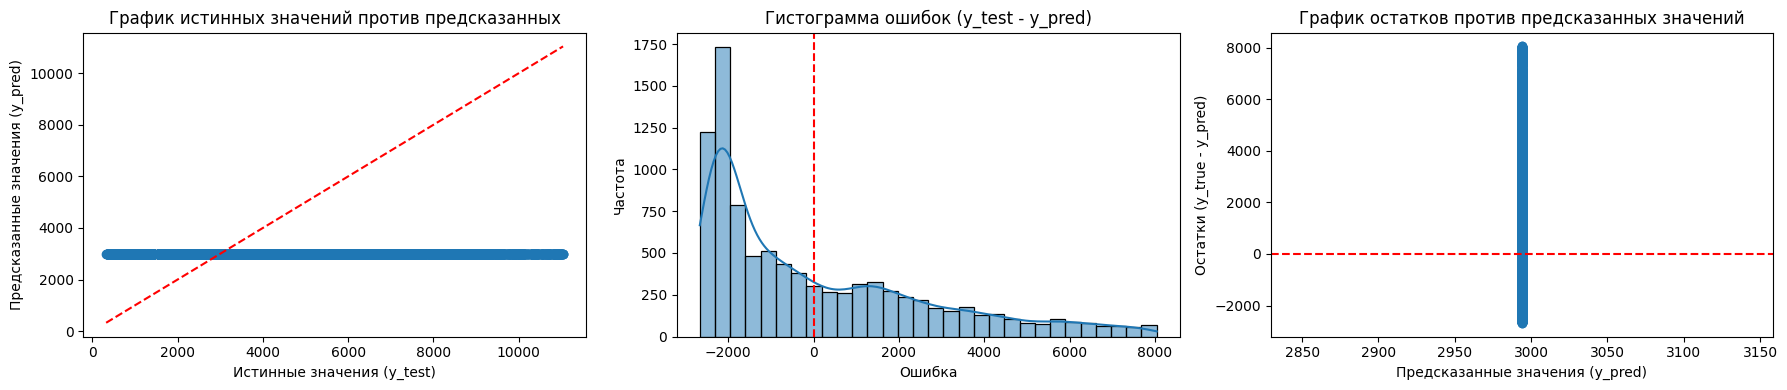

In [29]:
y_pred_mean = np.full_like(y_test, y_train.mean())
regression_metrics(y_test, y_pred_mean)

Как и следовало ожидать, все метрики базовой модели оставляют жедать лучшего. Что говорит о её полной непригодности.

#### LinearRegression

R2 0.9254753403951357
MAE 515.9121735976789
RMSE 715.4392981002998
MAPE 0.32060331325878


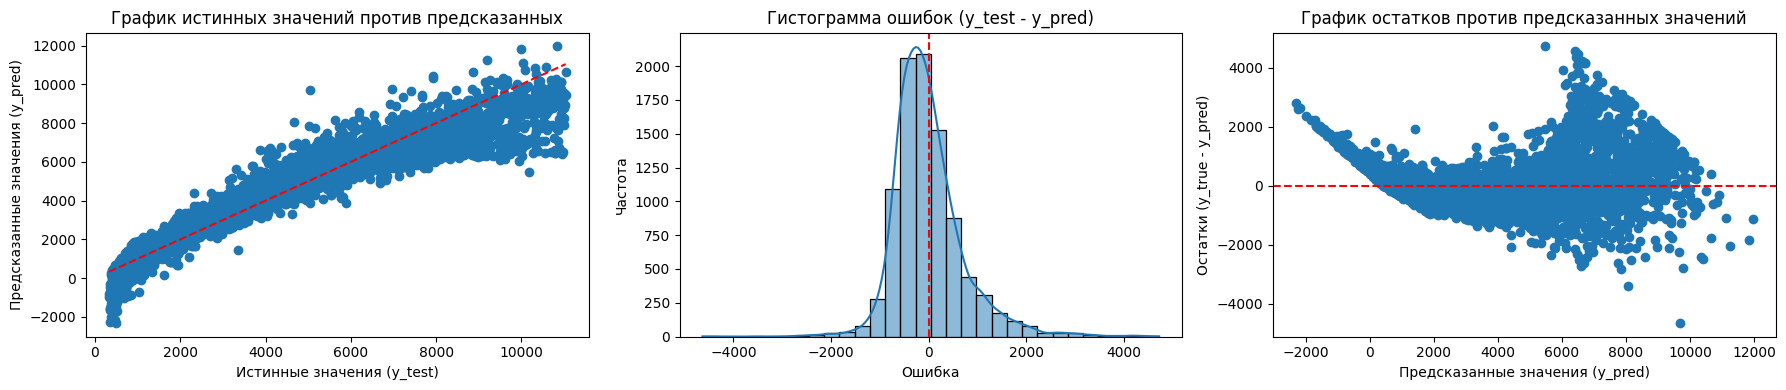

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_lr = model.predict(x_test)
regression_metrics(y_test.flatten(), y_pred_lr.flatten())

Данная модель значительно лучше базовой. Значение R2 = 91.4% говорит о том, что модель хорошо объясняет полученные данные. Но при этом имеет слишком большое среднее отклонение в 32%.

#### SVR

R2 -0.006574407961011941
MAE 1825.4800920874204
RMSE 2629.3338545378174
MAPE 0.8421191277485653


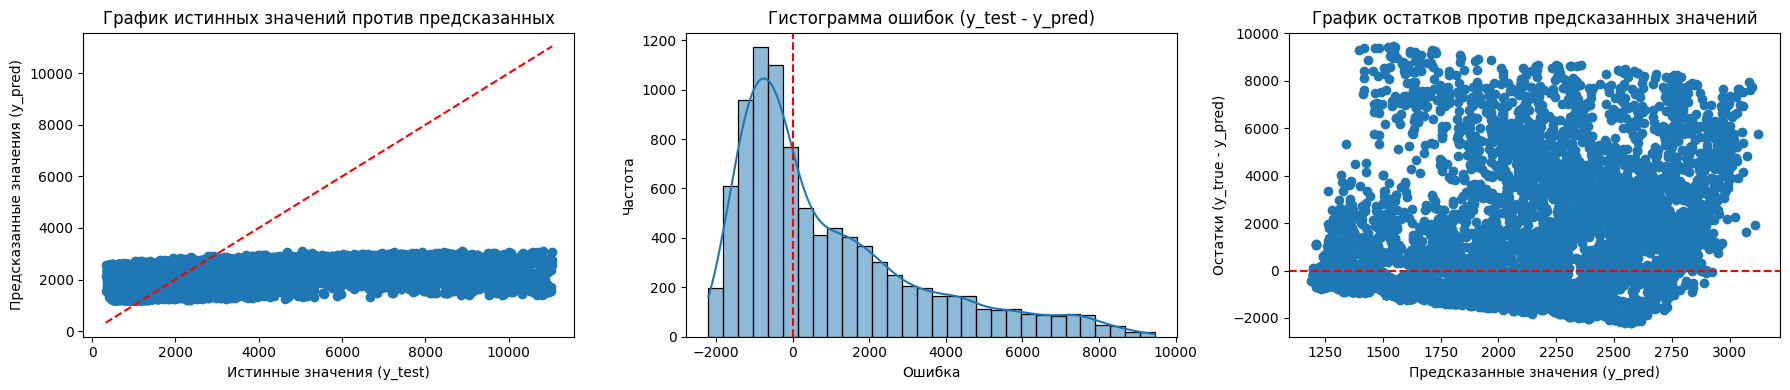

In [32]:
regr_svm = svm.SVR()
regr_svm.fit(x_train, y_train.flatten())
y_pred_svr = regr_svm.predict(x_test)
regression_metrics(y_test.flatten(), y_pred_svr.flatten())

Эта модель не далеко ушла от базовой.


#### SGDRegressor

R2 0.9250838882739363
MAE 520.0085248581988
RMSE 717.3158140768504
MAPE 0.3187857618091524


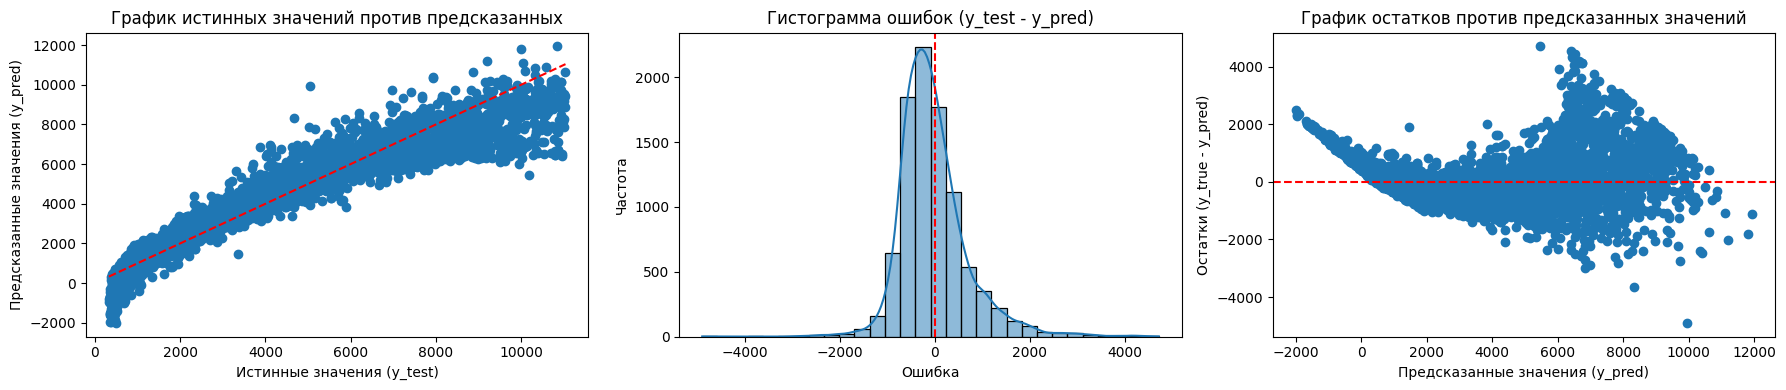

In [33]:
from sklearn.linear_model import SGDRegressor
regr_sgd = SGDRegressor()
regr_sgd.fit(x_train, y_train.flatten())
y_pred_sgd = regr_sgd.predict(x_test)
regression_metrics(y_test.flatten(), y_pred_sgd.flatten())

Показатели примерно такие же, как у линейной регрессии. Никаких приемуществ у этой модели нет.

#### DecisionTreeRegressor

R2 0.9728998991914977
MAE 239.0620407397651
RMSE 431.42791717299275
MAPE 0.08576966717957676


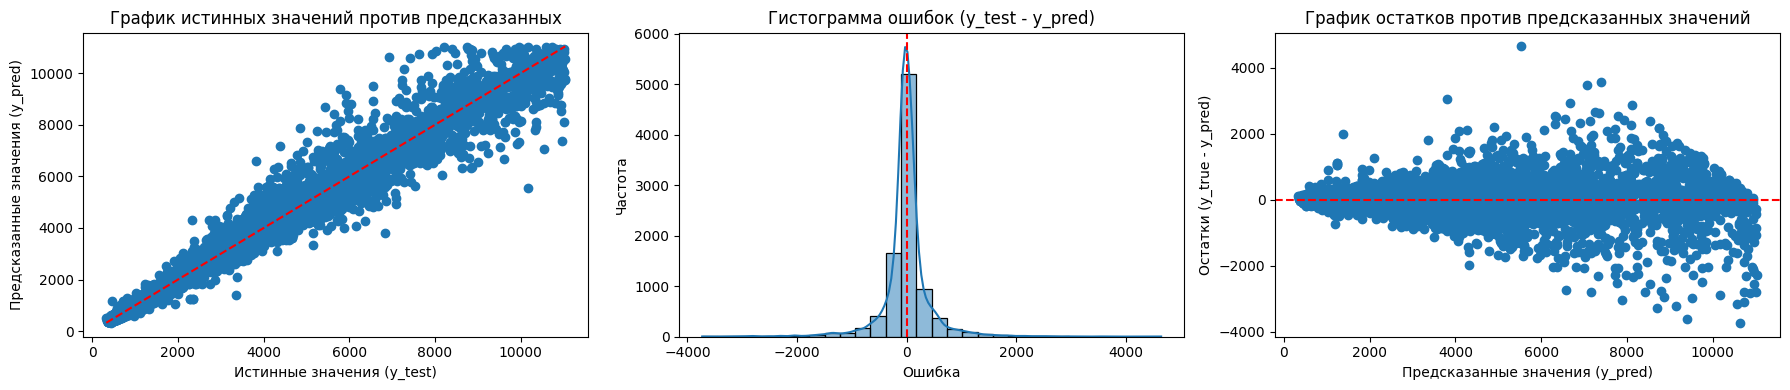

In [34]:
regr_tree = tree.DecisionTreeRegressor()
regr_tree.fit(x_train, y_train.flatten())
y_pred_dt = regr_tree.predict(x_test)
regression_metrics(y_test.flatten(), y_pred_dt.flatten())

Вот это - то, что надо. Эта модель имеет наилучшие показатели из всех протестированных. Попробуем её ещё улучшить.

### Оптимизация модели

Попробуем подобрать гиперпараметры


In [35]:
regr_tree.get_depth()

23

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train.flatten())

print("Лучшие параметры:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Лучшие параметры: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15}


R2 0.9766356766968645
MAE 228.39447573128658
RMSE 400.58934602108206
MAPE 0.08372346672393852


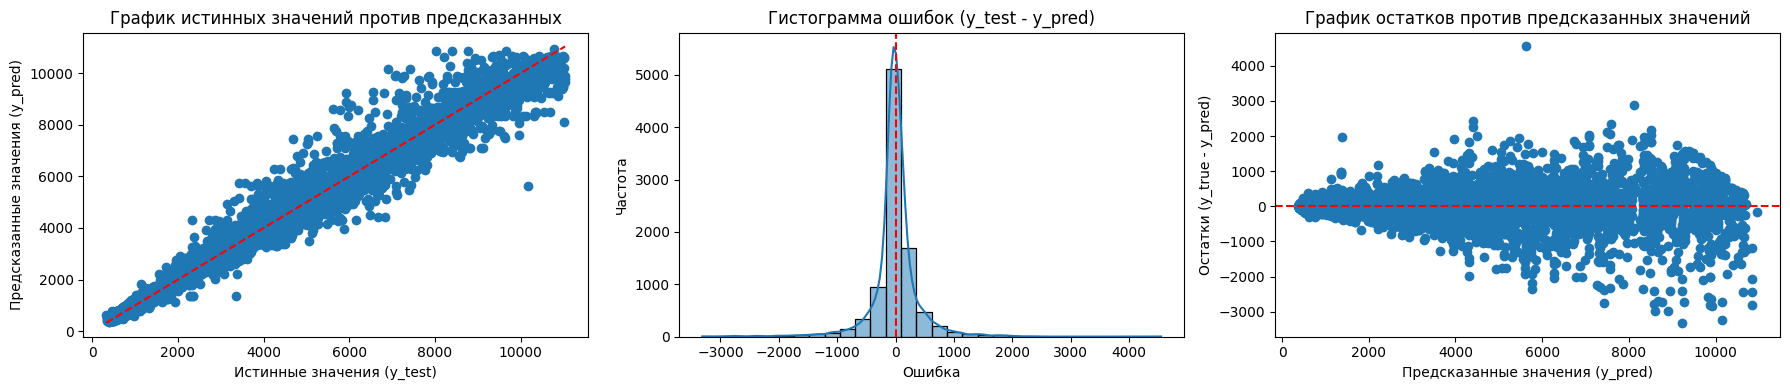

In [41]:
regr_tree = tree.DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=15, max_depth=15)
regr_tree.fit(x_train, y_train.flatten())
y_pred_dt = regr_tree.predict(x_test)
regression_metrics(y_test.flatten(), y_pred_dt.flatten())

Подбор параметров позволил немного улучшить качество модели.

### Прогноз

In [43]:
y_forecast = regr_tree.predict(x_forecast)

In [44]:
df.columns

Index(['carat', 'price', 'cut_value', 'clarity_value', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [51]:
columns = ['carat', 'cut_value', 'clarity_value', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']
x_forecast_df = pd.DataFrame(x_forecast, columns=columns)
y_forecast_df = pd.Series(y_forecast, name='price')

forecast_df = pd.concat([x_forecast_df, y_forecast_df], axis=1)
forecast_df

,carat,cut_value,clarity_value,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.70,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2149.571429
1,1.20,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3363.785714
2,1.19,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5674.666667
3,1.51,3.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10848.250000
4,1.51,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9415.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.31,3.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,963.214286
9303,0.24,2.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,525.500000
9304,1.22,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9662.333333
9305,0.60,4.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2437.888889


### Выводы

Из описания датасета не понятно какой бизнес-процесс за ним стоит. Тут придётся пофантазировать.

Предположим, что мы занимаемся торговлей алмазами. Тогда при поступлении предложения о покупке алмаза с определенными характеристиками, мы можем быстро определить их рыночную цену для принятия решения о закупке.

Или, если занимаемся производством алмазов, также можем определить рыночную цену готовой продукции.